# Analyzing 2019 Citibike Data

### Questions to Ask 

- Where do Citibikers ride to?
- When do they ride? What days/hours/months are the most popular for usage?
- How far do Citibikes go?
- Which stations are the most popular?

In [1]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import folium  #needed for interactive map
from folium.plugins import HeatMap
%matplotlib inline
sns.set()

#import 2019 data
frame = pd.read_csv('frame_2019.csv')
frame.sample(10)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,birth year,gender,starttimemonth,starttimeweekday,starttimehour,starttimeyear
15001206,6.450,2019-09-19 13:47:08.834,2019-09-19 13:53:36.212,3329.0,Degraw St & Smith St,40.682915,-73.993182,3440.0,Fulton St & Adams St,40.692418,-73.989495,25813,1990,1,9,3,13,2019
4499616,5.600,2019-04-22 10:24:13.314,2019-04-22 10:29:50.284,461.0,E 20 St & 2 Ave,40.735877,-73.982050,402.0,Broadway & E 22 St,40.740343,-73.989551,30167,1987,0,4,0,10,2019
17179051,3.700,2019-10-17 17:38:09.293,2019-10-17 17:41:51.938,531.0,Forsyth St & Broome St,40.718939,-73.992663,350.0,Clinton St & Grand St,40.715595,-73.987030,40056,1974,0,10,3,17,2019
4241109,5.367,2019-04-17 16:47:06.815,2019-04-17 16:52:29.692,3711.0,E 13 St & Avenue A,40.729667,-73.980680,301.0,E 2 St & Avenue B,40.722174,-73.983688,33038,1952,1,4,2,16,2019
15961795,16.567,2019-09-30 15:04:03.498,2019-09-30 15:20:38.032,2012.0,E 27 St & 1 Ave,40.739445,-73.976806,361.0,Allen St & Hester St,40.716059,-73.991908,38891,1990,2,9,0,15,2019
11538010,15.983,2019-08-05 07:32:00.020,2019-08-05 07:47:59.222,519.0,Pershing Square North,40.751873,-73.977706,482.0,W 15 St & 7 Ave,40.739355,-73.999318,28807,1978,1,8,0,7,2019
8280732,3.817,2019-06-20 15:10:23.956,2019-06-20 15:14:13.373,305.0,E 58 St & 3 Ave,40.760958,-73.967245,3734.0,E 58 St & 1 Ave (NW Corner),40.759125,-73.962658,27295,1958,1,6,3,15,2019
6757403,8.217,2019-05-29 12:57:07.204,2019-05-29 13:05:20.648,3459.0,E 53 St & 3 Ave,40.757632,-73.969306,3699.0,W 50 St & 9 Ave,40.763605,-73.989180,32809,1991,1,5,2,12,2019
13412892,16.017,2019-08-29 21:09:19.659,2019-08-29 21:25:21.345,319.0,Fulton St & Broadway,40.711066,-74.009447,497.0,E 17 St & Broadway,40.737050,-73.990093,27218,2000,1,8,3,21,2019
19177901,4.733,2019-11-21 10:46:51.684,2019-11-21 10:51:36.081,151.0,Cleveland Pl & Spring St,40.722104,-73.997249,386.0,Centre St & Worth St,40.714948,-74.002345,34390,1964,1,11,3,10,2019


In [2]:
#examine the data types of the 2020 dataset
frame.dtypes

tripduration               float64
starttime                   object
stoptime                    object
start station id           float64
start station name          object
start station latitude     float64
start station longitude    float64
end station id             float64
end station name            object
end station latitude       float64
end station longitude      float64
bikeid                       int64
birth year                   int64
gender                       int64
starttimemonth               int64
starttimeweekday             int64
starttimehour                int64
starttimeyear                int64
dtype: object

In [3]:
#convert columns to correct datatypes
frame['start station name'] = frame['start station name'].astype('category')
frame['start station id'] = frame['start station id'].astype('category')
frame['end station id'] = frame['end station id'].astype('category')
frame['end station name'] = frame['end station name'].astype('category')

#convert the starttime and stoptime columns to datetime
frame['starttime'] = pd.to_datetime(frame['starttime'])
frame['stoptime'] = pd.to_datetime(frame['stoptime'])

## Seasonal Trend Analysis

Aim to see if there are any trends in seasonality.

In [4]:
#create groupby object to see rides by month
monthly_rides = frame.groupby(['starttimemonth']).size()

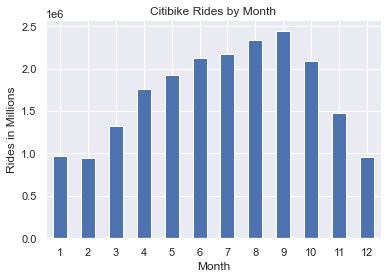

In [5]:
#plot monthly rides
ax = monthly_rides.plot(kind='bar', 
                   title='Citibike Rides by Month', 
                   rot=0)

ax.set_xlabel("Month")
ax.set_ylabel("Rides in Millions")

#hide top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

The months with the lowest ridership on Citibike are generally the winter months. However, due to the beginning of the COVID-19 lockdown, the lowest month was April. Peak months of ridership are August and September.

In [6]:
#create groupby object to see rides by weekday
weekday_rides = frame.groupby(['starttimeweekday']).size()

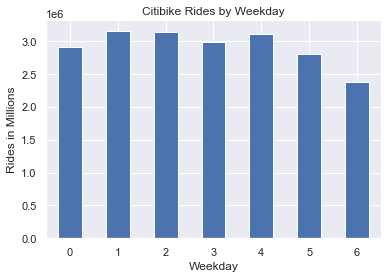

In [7]:
#plot the weekly rides
ax = weekday_rides.plot(kind='bar', 
                   title='Citibike Rides by Weekday', 
                   rot=0)

ax.set_xlabel("Weekday")
ax.set_ylabel("Rides in Millions")

#hide top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

Saturday as denoted as 6 is the day with the lowest number of rides. Monday as denoted as 1 is the day with the most rides. 

Now let's look at hours.

In [8]:
#create groupby object to see rides by the hour
ride_hours = frame.groupby(['starttimehour']).size()

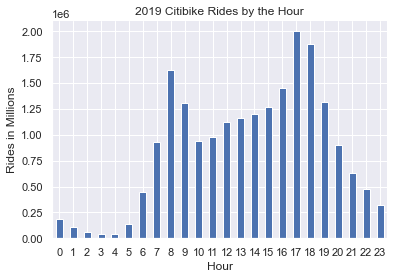

In [9]:
ax = ride_hours.plot(kind='bar', 
                   title='2019 Citibike Rides by the Hour', 
                   rot=0)

ax.set_xlabel("Hour")
ax.set_ylabel("Rides in Millions")

#hide top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

Here we see that 3 AM is the hour with the least amount of rides. The peak time is 5 PM, which aligns with the usual commuter time back home. 

Given that Friday and Saturday are the days with the most rides, I would like to examine these days and analyze the hourly trends.

In [10]:
day_hour_rides = frame.groupby(['starttimeweekday','starttimehour']).size()
monday_rides = day_hour_rides[1]
tuesday_rides = day_hour_rides[2]

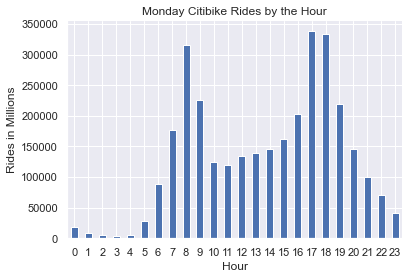

In [11]:
ax = monday_rides.plot(kind='bar', 
                   title='Monday Citibike Rides by the Hour', 
                   rot=0)

ax.set_xlabel("Hour")
ax.set_ylabel("Rides in Millions")

#hide top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

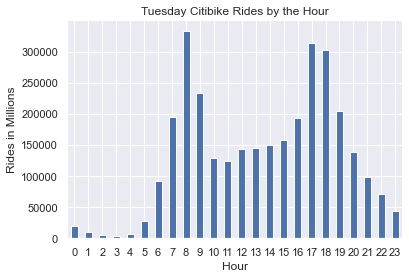

In [12]:
ax = tuesday_rides.plot(kind='bar', 
                   title='Tuesday Citibike Rides by the Hour', 
                   rot=0)

ax.set_xlabel("Hour")
ax.set_ylabel("Rides in Millions")

#hide top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

## Analyzing Demographics

- What genders and age use Citibike the most?

Citibike categories their customers' genders as such:
   - 0 = Unknown
   - 1 = Male
   - 2 = Female

In [13]:
frame['gender'].value_counts().sort_values(ascending=False)

1    14041107
2     4932960
0     1548780
Name: gender, dtype: int64

In [14]:
frame['birth year'].value_counts().sort_values(ascending=False)

1969    1700401
1989     852778
1990     850035
1991     817065
1992     803095
         ...   
1905          2
1906          2
1863          2
1903          1
1880          1
Name: birth year, Length: 118, dtype: int64

In [15]:
print(frame['birth year'].min())
print(frame['birth year'].max())

1857
2003


## Spatial Analysis

Aim to analyze the expansion of stations and the stations where rides start the most.

In [16]:
#obtain the latitude and longitude for stations
latlongs = list(set(list(zip(frame['start station latitude'], frame['start station longitude']))))

In [17]:
#2020 locations
from folium import plugins
from folium.plugins import HeatMapWithTime

#mapping where trips start 
ny_coords = [40.738, -73.98]
folium_map = folium.Map(location=ny_coords, zoom_start=13, tiles="CartoDB dark_matter")


for lat,log in latlongs:
        folium.features.CircleMarker(
            [lat, log],
            radius=3,
            color='red',
            fill=True,
            fill_color='darkred',
            fill_opacity=0.6).add_to(folium_map)

folium_map

In [18]:
folium_map.save("locations_2020.html")

In [19]:
location_rides = frame.groupby(['start station latitude','start station longitude']).size().reset_index()
location_rides = location_rides.rename(columns={0:'Rides'})
location_rides

,start station latitude,start station longitude,Rides
0,40.655400,-74.010628,2830
1,40.657089,-74.008702,5320
2,40.661063,-73.979453,32100
3,40.662706,-73.956912,3231
4,40.663062,-73.953875,5441
...,...,...,...
1042,40.866000,-73.896000,7
1043,40.866000,-73.893000,3
1044,40.866000,-73.884000,3
1045,40.869000,-73.902000,2


In [20]:
location_rides_zip = zip(location_rides['start station latitude'],location_rides['start station longitude'], location_rides['Rides'])

hm_layer = HeatMap(list(location_rides_zip),
                   min_opacity=0.2,
                   radius=8,
                   blur=6, 
                 )

In [21]:
#heatmap of where most rides start in 2019
ny_coords = [40.738, -73.98]
folium_hmap = folium.Map(location=ny_coords, zoom_start=13, tiles="CartoDB dark_matter")


folium_hmap.add_child(hm_layer)
folium_hmap


In [22]:
folium_hmap.save("hmap_2020.html")

In [23]:
#most popular start stations for rides
frame['start station name'].value_counts().sort_values(ascending=False).head(10)

Pershing Square North            156484
E 17 St & Broadway               121694
8 Ave & W 31 St                  119871
Broadway & E 22 St               113055
Broadway & E 14 St               112873
W 21 St & 6 Ave                  110236
West St & Chambers St            105505
Broadway & W 60 St               102974
Christopher St & Greenwich St    101314
12 Ave & W 40 St                  99118
Name: start station name, dtype: int64

In [24]:
#creating csv of just locations and their lats & longs
locations_2019 = frame[['start station name','start station latitude','start station longitude']].drop_duplicates()

#frame.groupby(['start station name','start station latitude','start station longitude']).size().reset_index()
#locations_2019 = location_rides.rename(columns={0:'Rides'})
locations_2019.to_csv(r'C:\Users\nicol\Documents\DS4A\Group Project\Citibike Data\locations_2019.csv', header=True)